In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tqdm import tqdm
import imutils
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# #The following code is an example of using the numpy, scikit-image and matplotlib
# #libraries for feature extraction from an image.  The code shows examples of converting
# #a coin image to greyscale, and then applying a Gaussian filter, adding Gaussian noise,
# #rotating the image 30 degrees clockwise, scaling the image by a factor of 1.5 increase,
# #and then applying a histogram equalization to the image.

# #The code then generates feature images based on the first 4 geometric Hu moments, described
# #in A.A.Ghostasby's "Image Registration: Principles, Tools and Methods",Chapter 4 (Springer, New York)
# #and in the following paper by Hu:  Hu M. K, "Visual pattern recognition by moment invariants", IEEE
# #Trans. Inf. Theory 8, pp.179-187 (1962).






# ###################
# #LIBRARIES/MODULES#
# ###################

# #Import the numeric python library.
# import numpy as np

# #Import Pyplot module from the matplotlib library to be able to show images.
# import matplotlib.pyplot as plt

# #Input/output library from the sci-kit image library.
# from skimage import io, filters, util, transform, exposure, measure

# #Colormap module imported from the matplot library.
# import matplotlib.cm as cm








# #####################################################################################
# #CODE SEGMENT:  Convert RGB color image to 8-bit greyscale image with this function.#
# #####################################################################################

# #Function to take the weighted average of a pixel in a rgb color image to convert it to
# #grey scale.  This weighted average approach is optimized to the sensitivity of the
# #human eye.  The weighted average is the luma equation described in the specification
# #ITU-R BT.601
# def weightedAverage(pixel):
#     return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]









# ##########################################################################################
# #CODE SEGMENT:  Function to calculate and display the Hu geometric moment feature images.#
# ##########################################################################################

# #Define a function with an input image and generate/display a feature image as the output.
# def FeatureImage(input_image):

#      #Initialize the feature images with zeros.  Each feature image will be one of the first
#      #four Hu moment images.  These will also be 8-bit grey scale images.
#      feature_image_HU1 = np.zeros((input_image.shape[0], input_image.shape[1]))
#      feature_image_HU2 = np.zeros((input_image.shape[0], input_image.shape[1]))
#      feature_image_HU3 = np.zeros((input_image.shape[0], input_image.shape[1]))
#      feature_image_HU4 = np.zeros((input_image.shape[0], input_image.shape[1]))

#      #Fill in the feature images using the input image.
#      for rownum in range(len(input_image)):
#           for colnum in range(len(input_image[rownum])):

#                #location and size of the circle for the mask.  xc, yc and r are the x center, y center
#                #and radius of the circle, respectively.  The radius of the circle
#                #is chosen to be 8 pixels.  The mask will start at the top left corner of the image
#                #and then move across and then down each row.
#                xc, yc, r = colnum, rownum, 8


#                # size of the input image.
#                H, W = input_image.shape


#                # x and y coordinates of every pixel of the image
#                x,y = np.meshgrid(np.arange(W), np.arange(H))


#                # squared distance from the center of the circle
#                d2 = (x - xc)**2 + (y - yc)**2


#                # mask is True inside of the circle.  This is a boolean matrix
#                mask = d2 < r**2


#                #Show the new image after applying the mask.  Multiply does element by element multiplication
#                #for two matrices.
#                new_image = np.multiply(mask, input_image)


#                #Calculate the moments of the masked input image.
#                m_image = measure.moments(new_image)

#                #y-cordinate center of gravity
#                cr = m_image[0, 1] / m_image[0, 0]


#                #x co-ordinate center of gravity
#                cc = m_image[1, 0] / m_image[0, 0]


#                #Calculate the central moments of the masked input image.
#                mc_image = measure.moments_central(new_image, cr, cc)


#                #Calculate the normalized central moments of the masked input image.
#                ncm_image = measure.moments_normalized(mc_image)


#                #Calculate the Hu moments of the masked input image.
#                hu_image = measure.moments_hu(ncm_image)


#                #Add the current Hu moment value to the feature image in the appropriate location.
#                #A seperate feature image will be created for each Hu moment.  Images using only
#                #the first 4 Hu moments will be generated.
#                feature_image_HU1[rownum,colnum] = hu_image[0]
#                feature_image_HU2[rownum,colnum] = hu_image[1]
#                feature_image_HU3[rownum,colnum] = hu_image[2]
#                feature_image_HU4[rownum,colnum] = hu_image[3]


#      #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
#      feature_image_HU1 = exposure.rescale_intensity(feature_image_HU1, out_range = np.uint8)
#      feature_image_HU1 = np.round(feature_image_HU1,0)


#      #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
#      feature_image_HU2 = exposure.rescale_intensity(feature_image_HU2, out_range = np.uint8)
#      feature_image_HU2 = np.round(feature_image_HU2,0)


#      #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
#      feature_image_HU3 = exposure.rescale_intensity(feature_image_HU3, out_range = np.uint8)
#      feature_image_HU3 = np.round(feature_image_HU3,0)


#      #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
#      feature_image_HU4 = exposure.rescale_intensity(feature_image_HU4, out_range = np.uint8)
#      feature_image_HU4 = np.round(feature_image_HU4,0)



#      #Create the figure to show all 4 HU moment feature images for the input image.
#      plt.figure()

#      plt.subplot(2,2,1)

#      plt.imshow(feature_image_HU1, cmap = cm.Greys_r)
#      plt.axis('off')
#      plt.title('Feature image:  1st HU moment')


#      plt.subplot(2,2,2)

#      plt.imshow(feature_image_HU2, cmap = cm.Greys_r)
#      plt.axis('off')
#      plt.title('Feature image:  2nd HU moment')


#      plt.subplot(2,2,3)

#      plt.imshow(feature_image_HU3, cmap = cm.Greys_r)
#      plt.axis('off')
#      plt.title('Feature image:  3rd HU moment')


#      plt.subplot(2,2,4)

#      plt.imshow(feature_image_HU4, cmap = cm.Greys_r)
#      plt.axis('off')
#      plt.title('Feature image:  4th HU moment')


#      #Show all the feature images for the input image on the same plot.
#      plt.show()

#      return feature_image_HU1, feature_image_HU2, feature_image_HU3, feature_image_HU4










# ########################################################################################
# #CODE SEGMENT:  Function to calculate the invariance values between the greyscale image#
# #and each of the feature images.########################################################
# ########################################################################################

# def Invariances(grey_image_md, feature_image_md):


#      #Invariance values calculated between the greyscale image and the feature image
#      #for all 4 Hu moments.
#      Hu1_Inv = 1 - (np.mean(np.absolute(grey_image_md[0]-feature_image_md[0])))/255
#      Hu2_Inv = 1 - (np.mean(np.absolute(grey_image_md[1]-feature_image_md[1])))/255
#      Hu3_Inv = 1 - (np.mean(np.absolute(grey_image_md[2]-feature_image_md[2])))/255
#      Hu4_Inv = 1 - (np.mean(np.absolute(grey_image_md[3]-feature_image_md[3])))/255


#      return Hu1_Inv, Hu2_Inv, Hu3_Inv, Hu4_Inv










# ##################################################################
# #CODE SEGMENT:  Read in the coin image and covert it to greyscale#
# ##################################################################


# #Create an image variable by reading in a color rgb image file of a coin.
# image1 = io.imread("1804_dollar_obverse.png")


# #Use a loop to convert the iamge to 8 bit grayscale.

# #Intialize the grayscale image with zeros. Shape[0] and
# #Shape[1] correspond to rows and columns, respectively.
# #Make the image an 8-bit greyscale (intensity range of 0-255)
# grey_image = np.zeros((image1.shape[0], image1.shape[1]), dtype=np.uint8) # init 2D numpy array


# #Fill in the initialized grey scale image using the loop with the weighted average function.
# for rownum in range(len(image1)):
#    for colnum in range(len(image1[rownum])):
#       grey_image[rownum,colnum] = weightedAverage(image1[rownum,colnum])










# #################################
# #CODE SEGMENT:  Image processing#
# #################################





# ########################
# #FILTERED/BLURRED IMAGE#
# ########################

# #Filtered greyscale image using a gaussian filter with a standard deviation of 1.5 pixels.
# filtered_image = filters.gaussian_filter(grey_image, sigma=1.5)

# #Convert the filtered image back to unsigned 8-bit integer.
# filtered_image = util.img_as_ubyte(filtered_image)




# #############
# #NOISY IMAGE#
# #############

# #Noise added to the original greyscale image.  Use Gaussian nose with a standard deviation
# #of 20 (on the 8-bit uint8 scale-{0-255}).
# noisy_image = util.random_noise(grey_image,'gaussian',var=0.006)

# #Convert the noisy image back to unsigned 8-bit integer greyscale (uint8).
# noisy_image = util.img_as_ubyte(noisy_image)




# ###############
# #ROTATED IMAGE#
# ###############

# #Rotate the grey scale image by 30 degrees clockwise.
# rotated_image = transform.rotate(grey_image,-30)


# #Convert the rotated image back to unsigned 8-bit integer.
# rotated_image = util.img_as_ubyte(rotated_image)


# #In the rotated image, find the co-ordinates around the coin edges where
# #the image intensity is zero as a result of the rotation.
# x_zero,y_zero = np.where(rotated_image == 0)


# #Set the zero intensity regions to maximum intensity instead
# #(=255) using uint8.
# rotated_image[x_zero,y_zero] = 255




# ##############
# #SCALED IMAGE#
# ##############

# #Scale the grey scale image to be larger by a factor of 1.5
# scaled_image = transform.rescale(grey_image,1.5)


# #Convert the scaled image back to unsigned 8-bit integer.
# scaled_image = util.img_as_ubyte(scaled_image)





# ###########################
# #HISTOGRAM EQUALIZED IMAGE#
# ###########################

# #Determine an equalized histogram version of the grey scale image.
# equalized_image = exposure.equalize_hist(grey_image)


# #Equalized image rescaled back to uint8 scale.
# equalized_image = util.img_as_ubyte(equalized_image)










# ######################################################################
# #CODE SEGMENT:  Plot and display all the original non-feature iamges.#
# ######################################################################
# plt.figure(1)


# plt.subplot(2,3,1)

# #Plot and show the greyscale image using a greyscale colormap.
# plt.imshow(grey_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Greyscale image')


# plt.subplot(2,3,2)

#  #Plot and show the filtered image using a greyscale colormap.
# plt.imshow(filtered_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Blurred image: Gaussian SD = 1.5 pixels')


# plt.subplot(2,3,3)

# #Plot and show the noisy image using a greyscale colormap.
# plt.imshow(noisy_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Noisy image: Gaussian SD = 20')


# plt.subplot(2,3,4)

# #Plot and show the rotated image using a greyscale colormap.
# plt.imshow(rotated_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Rotated image (30 degrees clockwise)')


# plt.subplot(2,3,5)

# #Plot and show the scaled image using a greyscale colormap.
# plt.imshow(scaled_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Scaled image (factor of 1.5 larger)')


# plt.subplot(2,3,6)

# #Plot and show the equalized histogram image using a greyscale colormap.
# plt.imshow(equalized_image, cmap = cm.Greys_r)
# plt.axis('off')
# plt.title('Histogram equalized image')


# #Show all the images at once.
# plt.show()









# ###############################################################################################
# #CODE SEGMENT:  Function calls to generate the 4 Hu moment feature images for each input image#
# ###############################################################################################

# #Call the function to create, store and display the Hu moment feature images
# #for the greyscale image.
# grey_image_moment_data = FeatureImage(grey_image)





# #Call the function to create and display the Hu moment feature images
# #for the filtered/blurred image.
# filtered_image_moment_data = FeatureImage(filtered_image)


# #Calculate the blurring invariance (BI) property, between the feature greyscale image
# #and the feature filtered image for each of the Hu moments.
# BI = Invariances(grey_image_moment_data,filtered_image_moment_data)


# #Print the values of the BI rounded to two decimal places.
# print(np.round(BI,2))





# #Call the function to create and display the Hu moment feature images
# #for the noisy image.
# noisy_image_moment_data = FeatureImage(noisy_image)


# #Calculate the noise invariance (NI) property, between the feature greyscale image
# #and the feature noise image for each of the Hu moments.
# NI = Invariances(grey_image_moment_data,noisy_image_moment_data)


# #Print the values of the NI rounded to two decimal places.
# print(np.round(NI,2))






# #Call the function to create and display the Hu moment feature images
# #for the rotated image.
# rotated_image_moment_data = FeatureImage(rotated_image)


# #Calculate the rotational invariance (RI) property, between the feature greyscale image
# #and the feature rotated image for each of the Hu moments.
# RI = Invariances(grey_image_moment_data,rotated_image_moment_data)


# #Print the values of the RI rounded to two decimal places.
# print(np.round(RI,2))






# #Call the function to create and display the Hu moment feature images
# #for the scaled image.  To facilitate the calculation, the scaled image
# #is centrally cropped, to be the same size as the greyscale image.
# scaled_image_moment_data = FeatureImage(scaled_image[76:383,77:387])


# #Calculate the scale invariance (SI) property, between the feature greyscale image
# #and the feature scaled image for each of the Hu moments.
# SI = Invariances(grey_image_moment_data,scaled_image_moment_data)


# #Print the values of the SI rounded to two decimal places.
# print(np.round(SI,2))





# #Call the function to create and display the Hu moment feature images
# #for the histogram equalized image.
# equalized_image_moment_data = FeatureImage(equalized_image)


# #Calculate the intensity invariance (II) property, between the feature greyscale image
# #and the feature histogram equalized image for each of the Hu moments.
# II = Invariances(grey_image_moment_data,equalized_image_moment_data)


# #Print the values of the II rounded to two decimal places.
# print(np.round(II,2))

In [3]:
##########################################################################################
#CODE SEGMENT:  Function to calculate and display the Hu geometric moment feature images.#
##########################################################################################

#Define a function with an input image and generate/display a feature image as the output.
def FeatureImage(input_image):
    #Initialize the feature images with zeros.  Each feature image will be one of the first
    #four Hu moment images.  These will also be 8-bit grey scale images.
    feature_image_HU1 = np.zeros((input_image.shape[0], input_image.shape[1]))
    feature_image_HU2 = np.zeros((input_image.shape[0], input_image.shape[1]))
    feature_image_HU3 = np.zeros((input_image.shape[0], input_image.shape[1]))
    feature_image_HU4 = np.zeros((input_image.shape[0], input_image.shape[1]))
    
    #Fill in the feature images using the input image.
    for rownum in range(len(input_image)) or colnum in range(len(input_image[rownum])):
            #location and size of the circle for the mask.  xc, yc and r are the x center, y center
            #and radius of the circle, respectively.  The radius of the circle
            #is chosen to be 8 pixels.  The mask will start at the top left corner of the image
            #and then move across and then down each row.
            xc, yc, r = colnum, rownum, 8
            # size of the input image
            H, W = input_image.shape
            # x and y coordinates of every pixel of the image
            x,y = np.meshgrid(np.arange(W), np.arange(H))
            # squared distance from the center of the circle
            d2 = (x - xc)**2 + (y - yc)**2
            # mask is True inside of the circle.  This is a boolean matrix
            mask = d2 < r**2
            #Show the new image after applying the mask.  Multiply does element by element multiplicationfor two matrices.
            new_image = np.multiply(mask, input_imag
            #Calculate the moments of the masked input image.
            m_image = measure.moments(new_image
            #y-cordinate center of gravity
            cr = m_image[0, 1] / m_image[0, 0]

            #x co-ordinate center of gravity
            cc = m_image[1, 0] / m_image[0, 0]
            #Calculate the central moments of the masked input image.
            mc_image = measure.moments_central(new_image, cr, cc)
            #Calculate the normalized central moments of the masked input image.
            ncm_image = measure.moments_normalized(mc_image)
            #Calculate the Hu moments of the masked input image.
            hu_image = measure.moments_hu(ncm_image)
            #Add the current Hu moment value to the feature image in the appropriate location.
            #A seperate feature image will be created for each Hu moment.  Images using only
            #the first 4 Hu moments will be generated.
            feature_image_HU1[rownum,colnum] = hu_image[0]
            feature_image_HU2[rownum,colnum] = hu_image[1]
            feature_image_HU3[rownum,colnum] = hu_image[2]
            feature_image_HU4[rownum,colnum] = hu_image[3]

     #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
     feature_image_HU1 = exposure.rescale_intensity(feature_image_HU1, out_range = np.uint8)
     feature_image_HU1 = np.round(feature_image_HU1,0)


     #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
     feature_image_HU2 = exposure.rescale_intensity(feature_image_HU2, out_range = np.uint8)
     feature_image_HU2 = np.round(feature_image_HU2,0)


     #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
     feature_image_HU3 = exposure.rescale_intensity(feature_image_HU3, out_range = np.uint8)
     feature_image_HU3 = np.round(feature_image_HU3,0)


     #Rescale the feature images to between [0-255].  Round the image values to no decimal places.
     feature_image_HU4 = exposure.rescale_intensity(feature_image_HU4, out_range = np.uint8)
     feature_image_HU4 = np.round(feature_image_HU4,0)



     #Create the figure to show all 4 HU moment feature images for the input image.
     plt.figure()

     plt.subplot(2,2,1)

     plt.imshow(feature_image_HU1, cmap = cm.Greys_r)
     plt.axis('off')
     plt.title('Feature image:  1st HU moment')


     plt.subplot(2,2,2)

     plt.imshow(feature_image_HU2, cmap = cm.Greys_r)
     plt.axis('off')
     plt.title('Feature image:  2nd HU moment')


     plt.subplot(2,2,3)

     plt.imshow(feature_image_HU3, cmap = cm.Greys_r)
     plt.axis('off')
     plt.title('Feature image:  3rd HU moment')


     plt.subplot(2,2,4)

     plt.imshow(feature_image_HU4, cmap = cm.Greys_r)
     plt.axis('off')
     plt.title('Feature image:  4th HU moment')


     #Show all the feature images for the input image on the same plot.
     plt.show()

     return feature_image_HU1, feature_image_HU2, feature_image_HU3, feature_image_HU4

########################################################################################
#CODE SEGMENT:  Function to calculate the invariance values between the greyscale image#
#and each of the feature images.########################################################
########################################################################################

def Invariances(grey_image_md, feature_image_md):
     #Invariance values calculated between the greyscale image and the feature image
     #for all 4 Hu moments.
     Hu1_Inv = 1 - (np.mean(np.absolute(grey_image_md[0]-feature_image_md[0])))/255
     Hu2_Inv = 1 - (np.mean(np.absolute(grey_image_md[1]-feature_image_md[1])))/255
     Hu3_Inv = 1 - (np.mean(np.absolute(grey_image_md[2]-feature_image_md[2])))/255
     Hu4_Inv = 1 - (np.mean(np.absolute(grey_image_md[3]-feature_image_md[3])))/255


     return Hu1_Inv, Hu2_Inv, Hu3_Inv, Hu4_Inv

SyntaxError: invalid syntax (3966029688.py, line 32)

In [10]:
file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0020.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Call the function to create, store and display the Hu moment feature images
#for the greyscale image.
grey_image_moment_data = FeatureImage(gray)


#Filtered greyscale image using a gaussian filter with a standard deviation of 1.5 pixels.
filtered_image = filters.gaussian_filter(gray, sigma=1.5)
#Convert the filtered image back to unsigned 8-bit integer.
filtered_image = util.img_as_ubyte(filtered_image)


#Call the function to create and display the Hu moment feature images
#for the filtered/blurred image.
filtered_image_moment_data = FeatureImage(filtered_image)


#Calculate the blurring invariance (BI) property, between the feature greyscale image
#and the feature filtered image for each of the Hu moments.
BI = Invariances(grey_image_moment_data,filtered_image_moment_data)


#Print the values of the BI rounded to two decimal places.
print(np.round(BI,2))

NameError: name 'FeatureImage' is not defined

In [11]:
import cv2
import numpy as np

file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0020.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Calculate the image moments of the grayscale image
moments = cv2.moments(gray)

# Calculate the centroid of the grayscale image
cx = int(moments['m10'] / moments['m00'])
cy = int(moments['m01'] / moments['m00'])

# Define the radius of the circular mask
radius = int(min(gray.shape) * 0.4)

# Create the circular mask
mask = np.zeros_like(gray)
cv2.circle(mask, (cx, cy), radius, 255, -1)

# Apply the mask to the grayscale image
masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

# Calculate the Hu moments of the masked grayscale image
hu_moments = cv2.HuMoments(cv2.moments(masked_gray)).flatten()

# Normalize the Hu moments
hu_moments_normalized = -np.sign(hu_moments) * np.log10(np.abs(hu_moments))

# Extract the first four Hu moment invariants
hu_invariants = hu_moments_normalized[:4]

# Print the extracted Hu moment invariants
# (HU1) brightness or intensity of the image
# (HU2) is related to the symmetry of the image around its vertical axis
# (HU3) is related to the symmetry of the image around its horizontal axis.
# (HU4) is related to the skewness of the image, or the degree to which it is asymmetrical.
print(hu_invariants)

[ 2.64803619  7.50142591 10.08428365 11.25675987]


In [ ]:
pip install -U scikit-image


In [ ]:
import numpy as np
from skimage import io, feature

file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0020.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define the distances and angles for the GLCM
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Calculate the GLCM for each distance and angle
glcm = feature.greycomatrix(gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)


# Define the GLCM features to extract
features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Calculate the GLCM features for each distance and angle
glcm_features = np.hstack([feature.texture.greycoprops(glcm, f) for f in features])

# Print the extracted GLCM features
print(glcm_features)

No contours found in input image


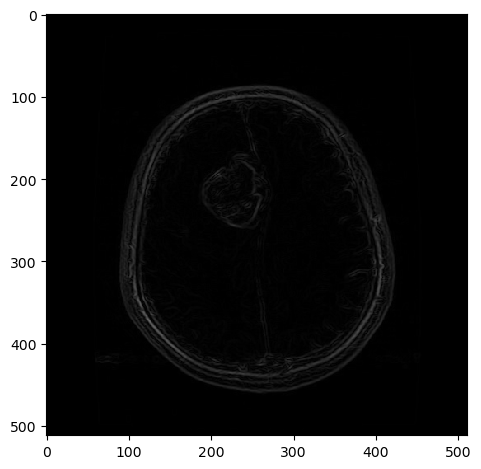

In [9]:
import numpy as np
from skimage import io, filters, measure

file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Enhance the edges and boundaries of the brain regions
edges = filters.sobel(gray)
imshow(edges)
# Extract the contours or boundaries of the brain regions
contours = measure.find_contours(edges, 0.8, fully_connected='high', positive_orientation='low')

# Check if any contours were found
if len(contours) == 0:
    print('No contours found in input image')
else:
    # Calculate a set of boundary-based features for each contour
    features = []
    for contour in contours:
        perimeter = measure.perimeter(contour)
        area = measure.area(contour)
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        convex_hull = measure.convex_hull_image(contour)
        convexity = area / np.sum(convex_hull)
        fractal_dimension = measure.fractal_dimension(contour)
        features.append([perimeter, area, circularity, convexity, fractal_dimension])

    # Convert the features to a numpy array
    features = np.array(features)

    # Check if any features were extracted
    if features.size == 0:
        print('No features extracted from input contours')
    else:
        # Print the extracted boundary-based features
        print(features)

In [7]:
import mahotas

file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Compute the Zernike moments of the image
zernike_coeffs = mahotas.features.zernike_moments(img, radius=25, degree=8)

# Print the Zernike coefficients
print('Zernike coefficients:', zernike_coeffs)

AttributeError: module 'mahotas' has no attribute 'features'

In [6]:
pip install mahotas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Compute the histogram of the image
hist, _ = np.histogram(img, bins=256, range=(0, 255))

# Normalize the histogram
hist = hist / np.sum(hist)

# Compute the entropy of the image
entropy = -np.sum(hist * np.log2(hist + 1e-9))

# Print the entropy
print('Entropy:', entropy)

# Compute the total energy of the image
energy = np.sum(np.square(img))

# Print the total energy
print('Total energy:', energy)

# Compute the RMS of the image
rms = np.sqrt(np.mean(np.square(img)))

# Print the RMS
print('RMS:', rms)

# Calculate the kurtosis of the image
k = kurtosis(img.flatten())

# Print the kurtosis
print('Kurtosis:', k)

Entropy: 4.778342013641512
Total energy: 36484314
RMS: 6.811182297124925
Kurtosis: 1.5045906148528099


In [18]:
file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg'
img = cv2.imread(file1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Get the intensity values as a NumPy array
intensity_values = np.array(gray.flatten())

# Compute the kurtosis of the intensity distribution
kurtosis_value = kurtosis(intensity_values)

# Print the kurtosis value
print("Kurtosis:", kurtosis_value)

Kurtosis: 1.5045906148528108
